In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.sparse.linalg import eigs

# 1. Markov chains

In [4]:
df = pd.read_csv('./hw4-data/CFB2019_scores.csv', header = None)

In [5]:
df.columns = ['A_index', 'A_points', 'B_index', 'B_points']

In [6]:
df.head()

,A_index,A_points,B_index,B_points
0,695,34,141,14
1,392,20,218,24
2,29,38,270,45
3,721,6,531,16
4,769,45,560,22


In [7]:
numpy_df = df.to_numpy()

In [8]:
# preprocessing

M = np.zeros((769, 769)) # initialize empty matrix

for row in range(numpy_df.shape[0]):
    
    i = numpy_df[row][0] - 1 # index of team A
    j = numpy_df[row][2] - 1 # index of team B
    pt_A = numpy_df[row][1] # points of A
    pt_B = numpy_df[row][3] # points of B
    #print(pt_A)
    #print(pt_B)
    
    weight = pt_A / (pt_A + pt_B) # get weight
    win = int(pt_A > pt_B) # check which team won
    
    # update
    M[i,i] += win + weight
    M[j,j] += (1 - win) + (1 - weight)
    M[i,j] += (1 - win) + (1 - weight)
    M[j,i] += win + weight

In [9]:
# normalizing
M = M/np.sum(M, axis = 1).reshape(-1, 1)

a. Use $w_t$ to rank teams by sorting in decreasing value according to this vector. List the top 25 team names and their corresponding values in $w_t$ for t = 10, 100, 1000, 10000.

In [10]:
name = pd.read_csv('./hw4-data/TeamNames.txt', names = ['team_name'], header=None)

In [11]:
w0 = np.repeat(1/769, 769) # set w_0 to uniform distribution
t_list = np.logspace(1, 4, 4) # define t as indicated

# create empty df
rank_df = pd.DataFrame(index = range(769), columns = ['name'] + ['t_%d'%i for i in t_list])
rank_df['name'] = name

# loop through each value, compute and store
for t in t_list:
    rank = np.dot(w0, np.linalg.matrix_power(M, int(t)))
    rank_df['t_%d'%t] = rank

In [12]:
rank_df_1 = rank_df.iloc[:, :2].sort_values('t_10', ascending = False)[:25]
rank_df_2 = rank_df.iloc[:, [0, 2]].sort_values('t_100', ascending = False)[:25]
rank_df_3 = rank_df.iloc[:, [0, 3]].sort_values('t_1000', ascending = False)[:25]
rank_df_4 = rank_df.iloc[:, [0, 4]].sort_values('t_10000', ascending = False)[:25]

In [13]:
mark_df = pd.DataFrame(index = range(25), columns = ['t_%d'%i for i in t_list])
j = 1
for i in np.logspace(1, 4, 4):
    mark_df['t_%d'%i] = rank_df.iloc[:, [0, j]].sort_values('t_%d'%i, ascending = False)[:25].apply(tuple, axis = 1).to_list()
    j+= 1

In [14]:
mark_df

,t_10,t_100,t_1000,t_10000
0,"(NorthCentral, 0.012811767852460866)","(LSU, 0.04364232313177094)","(LSU, 0.08441877504803548)","(LSU, 0.09136604712297448)"
1,"(LSU, 0.012577990806785502)","(Wheaton, 0.025821920667911235)","(Clemson, 0.04552711559660832)","(Clemson, 0.04926187613634674)"
2,"(Morningside, 0.011511484786453766)","(NorthCentral, 0.024441760152520895)","(OhioState, 0.04345179930190864)","(OhioState, 0.04700926622493663)"
3,"(Wheaton, 0.011088272722516578)","(Clemson, 0.02370440421016096)","(Georgia, 0.03271952980965489)","(Georgia, 0.03538167825057392)"
4,"(MinnSt-Mankato, 0.009632960447434464)","(OhioState, 0.022687728222489784)","(Alabama, 0.02467858477602385)","(Alabama, 0.026695336839191012)"
5,"(Muhlenberg, 0.009507044960042477)","(Morningside, 0.022621153936365095)","(Florida, 0.02369629109833148)","(Florida, 0.02562429247736426)"
6,"(OhioState, 0.00924059308427411)","(Georgia, 0.01716489849355654)","(Oregon, 0.019265508881883525)","(Oregon, 0.02077912941947386)"
7,"(UW-Whitewater, 0.009165130709944303)","(StJohnsMN, 0.014990097339229956)","(Auburn, 0.019036871697742357)","(Auburn, 0.020582092345403927)"
8,"(NorthDakotaSt, 0.009137454648190081)","(WestFlorida, 0.01336723941246717)","(Oklahoma, 0.018703418705854083)","(Oklahoma, 0.020201641742271653)"
9,"(Clemson, 0.008940922174482424)","(Alabama, 0.012917325410917094)","(PennState, 0.017974044767656055)","(PennState, 0.01942877308356717)"


b. Find $w_\infty$ by getting the first eigenvector and eigenvalue of $M^T$.

In [15]:
np.linalg.eig(M.T)[1].shape

(769, 769)

In [16]:
eigs(M.T, k = 1)[1].flatten().shape

(769,)

In [17]:
diff_result = []

w_inf = eigs(M.T, k = 1)[1].flatten()
w_inf = w_inf/np.sum(w_inf)

for t in range(1, 10001):
    w_t = np.dot(w0, np.linalg.matrix_power(M, t))
    diff_result.append(np.sum(np.abs(w_t - w_inf)))
    

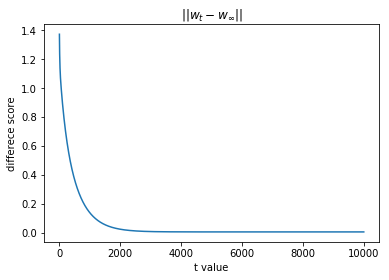

In [18]:
plt.plot(diff_result);
plt.xlabel('t value');
plt.ylabel('differece score');
plt.title('$||w_t - w_\infty\||$');
plt.savefig('1b')

# 2. Nonnegative matrix factorization

In [17]:
# 3012 as the number of words and 8447 as the number of documents
M = np.zeros((3012, 8447)) # set up empty matrix

In [18]:
f = open('./hw4-data/nyt_data.txt')
line = f.readline()

In [19]:
# fill in the matrix
document = 0 # count to index row
for line in f:
    word = line.split(',')
    for pair in word:
        pair = pair.split(':')
        M[int(pair[0]) - 1][document] = int(pair[1]) # ith row, jth column
    document += 1

a. Implement and run the NMF algorithm on this data using the divergence penalty. Set the rank to 25 and run for 100 iterations. This corresponds to learning 25 topics. Plot the objective as a function of iteration.

In [20]:
# objective function for divergence penalty
def objective_function(X, W, H):
    WH = np.dot(W, H)
    score = np.sum(np.multiply(X, np.log(1/(WH + 1e-16))) + WH)
    return score

In [21]:
# update H
def update_H(X, W, H):
    WH = np.dot(W, H)
    A = X/(WH + 1e-16)
    #print(np.multiply(H, W.dot(A))/np.sum(W, axis = 0).shape)
    new_H = np.multiply(H, W.T.dot(A))/np.sum(W, axis = 0).reshape(25, 1)
    
    return new_H

In [22]:
# update W
def update_W(X, W, H):
    WH = np.dot(W, H)
    A = X/(WH + 1e-16)
    
    new_W = np.multiply(W, A.dot(H.T))/np.sum(H, axis = 1).reshape(1, 25)
    
    return new_W

In [23]:
def algorithm(X, W, H, iteration):
    
    score_list = []
    
    for i in range(iteration):
        H = update_H(X, W, H)
        W = update_W(X, W, H)
        score = objective_function(X, W, H)
        
        score_list.append(score)
    
    return score_list, W

In [24]:
def pipeline(X, rank, iteration):
    row = X.shape[0]
    column = X.shape[1]
    d = rank
    
    # initialize
    W = np.random.uniform(1, 2, (row, d))
    H = np.random.uniform(1, 2, (d, column))
    
    result, new_W = algorithm(X, W, H, iteration)
    
    return result, new_W

In [25]:
result, new_W = pipeline(M, 25, 100)

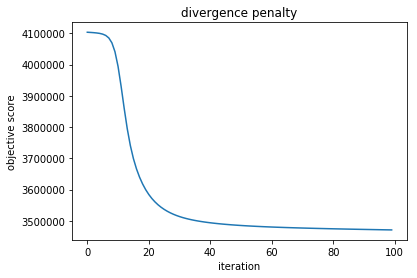

In [26]:
plt.plot(result);
plt.xlabel('iteration');
#plt.xticks(np.arange(1, 110, step = 20));
plt.ylabel('objective score');
plt.title('divergence penalty');
plt.savefig('2a');

b. After running, normalize the columns of W so they sum to one. For each column of W, list the 10 words having the largest weight and show the weight. The ith row of W corresponds to the ith word in the 'dictionary' provided with data.

In [27]:
nyt_vocab = pd.read_csv('./hw4-data/nyt_vocab.dat',header = None)
nyt_vocab.columns = ['term']

In [28]:
# normalize W
W_norm = new_W/(np.sum(new_W, axis = 0).reshape(1, -1))

In [30]:
W_df = pd.DataFrame(W_norm)
W_df['term'] = nyt_vocab.term
W_df.iloc[:, [0, -1]]

,0,term
0,1.636210e-58,company
1,9.272090e-04,percent
2,2.300420e-16,state
3,2.302375e-02,play
4,5.945609e-04,official
...,...,...
3007,1.480660e-30,helpful
3008,1.032471e-08,distinguish
3009,1.494475e-04,glad
3010,1.181151e-04,harder


In [31]:
nmf_df = pd.DataFrame(index = range(10), columns = ['Topic_%d'%i for i in range(1, 26)])

In [32]:
for i in range(0, 25):
    rank = W_df.iloc[:, [i, -1]].sort_values(i, ascending = False)[:10].apply(tuple, axis = 1)
    nmf_df['Topic_%d'%(i+1)] = rank.to_list()
    

In [33]:
nmf_df.to_csv('nmf.csv')

In [34]:
nmf_df

,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,...,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25
0,"(0.030761000703302573, game)","(0.011917900196568618, question)","(0.016353978525628404, art)","(0.020619402568702302, food)","(0.03127517802080141, police)","(0.02882509047960062, money)","(0.017973086814365526, state)","(0.014074834504006132, drug)","(0.01863325633569903, thing)","(0.03994969458177388, company)",...,"(0.021525140964408915, play)","(0.01271832482222498, system)","(0.017109862372910203, official)","(0.019454063626485406, case)","(0.024278939324428074, city)","(0.02980991668399348, television)","(0.022864756502394747, woman)","(0.03127816918454686, percent)","(0.01633567001369937, service)","(0.019635266436341912, hit)"
1,"(0.03074155353611475, team)","(0.011166121020613663, public)","(0.011284861847473451, artist)","(0.011709698507913266, restaurant)","(0.022725175941640426, kill)","(0.025552796816475244, pay)","(0.012614413116790771, bill)","(0.01378876027943205, health)","(0.01785493659897722, tell)","(0.02090767598919828, executive)",...,"(0.012731556800421385, night)","(0.012485622947822544, company)","(0.015639023106175168, states)","(0.01865200316636107, court)","(0.019469965908504826, building)","(0.02235820769912174, film)","(0.01887734633917842, wear)","(0.018205718477850373, rise)","(0.014178685597059471, travel)","(0.01729841821574316, win)"
2,"(0.02302375315685766, play)","(0.009869802690814252, issue)","(0.010477609009810313, collection)","(0.010748768302529608, serve)","(0.0183150677655712, officer)","(0.016941682384808723, cost)","(0.011907721581195978, program)","(0.013035815551424997, study)","(0.014952462301978171, ask)","(0.01706539488790093, president)",...,"(0.012529935853183098, sound)","(0.01187434165482907, technology)","(0.015502819695338262, american)","(0.01806691979782492, lawyer)","(0.014298930923576189, resident)","(0.019566323259726886, movie)","(0.013501701235860999, man)","(0.01801954365993587, rate)","(0.011716704876692978, site)","(0.0157241647391464, second)"
3,"(0.021459798924330226, player)","(0.009440505755740035, view)","(0.010081019595574035, museum)","(0.009470282128743599, eat)","(0.016756079458152075, man)","(0.009587001381342268, percent)","(0.011320042822908615, budget)","(0.012997411061011934, doctor)","(0.012676149535772941, feel)","(0.015925952779909748, business)",...,"(0.012486020672767436, moment)","(0.011360446285133186, develop)","(0.012814295572173536, government)","(0.01542816247182245, law)","(0.014091895882684292, area)","(0.01631527678621702, write)","(0.012190262832885611, white)","(0.01757549475395347, price)","(0.011107964504973984, information)","(0.012654391744320974, third)"
4,"(0.02015904905833407, season)","(0.007951766721976965, point)","(0.009069100597855326, design)","(0.009209761356454715, dinner)","(0.013202510570031092, arrest)","(0.008052020278111327, dollar)","(0.00986584389488836, plan)","(0.01169478585872155, report)","(0.011658080660513477, really)","(0.01300581776382036, chief)",...,"(0.010023921025228946, voice)","(0.011221297881904731, industry)","(0.010645982314209594, country)","(0.01323058217174141, charge)","(0.01128218922265623, town)","(0.014485318462952044, article)","(0.011797990307886518, black)","(0.016745327101513132, market)","(0.009641217116387334, hour)","(0.011502727362529858, race)"
5,"(0.012492457633708017, win)","(0.007546981202033162, thing)","(0.008992078940739449, photograph)","(0.00902553438679819, fresh)","(0.012253781109616646, crime)","(0.007748355141853159, fund)","(0.009072607589882436, vote)","(0.011319856247802067, medical)","(0.011457192811319895, lot)","(0.012921994142602892, sell)",...,"(0.009826086906059168, love)","(0.009904482597632248, project)","(0.008558295607053184, international)","(0.01129293390471752, judge)","(0.010505719488889976, build)","(0.013888469969748206, editor)","(0.011121697238755768, store)","(0.01178